![banner cnns ppgcc ufsc](http://www.lapix.ufsc.br/wp-content/uploads/2019/04/VC2.png)


### Initializations

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


# Immunohistochemical staining colors separation


Color deconvolution consists of the separation of features by their colors.

In this example we separate the immunohistochemical (IHC) staining from the
hematoxylin counterstaining. The separation is achieved with the method
described in [1]_, known as "color deconvolution".

The IHC staining expression of the FHL2 protein is here revealed with
Diaminobenzidine (DAB) which gives a brown color.


.. [1] A. C. Ruifrok and D. A. Johnston, "Quantification of histochemical
       staining by color deconvolution.," Analytical and quantitative
       cytology and histology / the International Academy of Cytology [and]
       American Society of Cytology, vol. 23, no. 4, pp. 291-9, Aug. 2001.




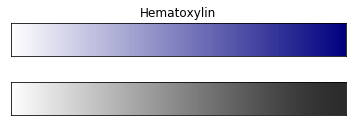

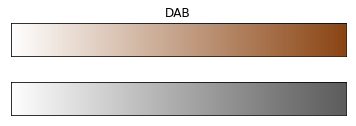

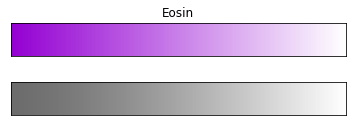

In [47]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap,title=''):
    """Plot a colormap with its grayscale equivalent"""
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].set_title(title)
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

# Create an artificial color close to the original one
cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white',
                                             'saddlebrown'])
cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet',
                                               'white'])

view_colormap(cmap_hema, "Hematoxylin")
view_colormap(cmap_dab, "DAB")
view_colormap(cmap_eosin, "Eosin")

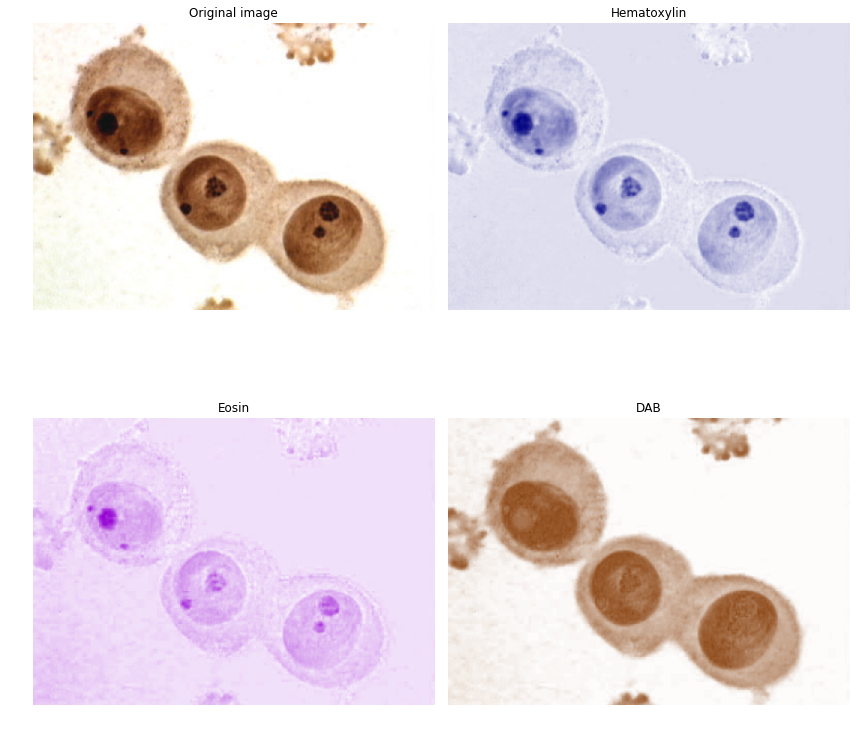

In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

from skimage import data
from skimage.color import rgb2hed
import matplotlib
from matplotlib.colors import LinearSegmentedColormap


ihc_rgb = cv2.imread('../data/AgNOR01a.png')
ihc_rgb = ihc_rgb[:, :, ::-1]
# ihc_rgb = data.immunohistochemistry()
ihc_hed = rgb2hed(ihc_rgb)

fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_hed[:, :, 0], cmap=cmap_hema)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_hed[:, :, 1], cmap=cmap_eosin)
ax[2].set_title("Eosin")

ax[3].imshow(ihc_hed[:, :, 2], cmap=cmap_dab)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()


Now we can easily manipulate the hematoxylin and DAB "channels":



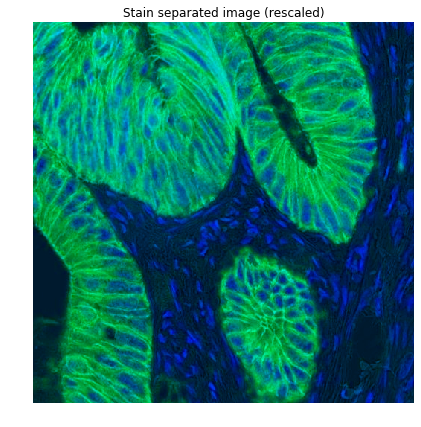

In [11]:
import numpy as np
from skimage.exposure import rescale_intensity

matplotlib.rcParams['figure.figsize'] = [20,7]


# Rescale hematoxylin and DAB signals and give them a fluorescence look
h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1))
d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1))
zdh = np.dstack((np.zeros_like(h), d, h))


fig = plt.figure()
axis = plt.subplot(1, 1, 1, sharex=ax[0], sharey=ax[0])
axis.imshow(zdh)
axis.set_title("Stain separated image (rescaled)")
axis.axis('off')
plt.show()

# Credits

* The colormap browsing code is adapted from https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html
* The cytology/pathology with immunohistochemistry example is adapted from the documentation of the SciKit library: https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_ihc_color_separation.html

![banner cnns ppgcc ufsc](http://www.lapix.ufsc.br/wp-content/uploads/2019/04/CC-incod.png)
